In [2]:
import pandas as pd 
import numpy as nm 
 
employee_data = pd.read_excel(r"D:\python projects\ML_Self_Prac\EmployeeSampleData\Employee Sample Data.xlsx")
employee_data.describe()
employee_data.head(5)
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

In [3]:
employee_data.describe()

,Age,Hire Date,Annual Salary,Bonus %,Exit Date
count,1000.000000,1000,1000.000000,1000.000000,85
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660,2016-11-02 18:04:14.117647104
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000,1994-12-18 00:00:00
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000,2014-12-25 00:00:00
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000,2019-05-23 00:00:00
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000,2021-04-09 00:00:00
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000,2022-08-17 00:00:00
std,11.246981,NaN,53545.985644,0.117856,NaN


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in split.split(employee_data, employee_data['Department']):
    strat_train_set = employee_data.loc[train_set]
    strat_test_set = employee_data.loc[test_set]
    print(len(train_set))
    print(len(test_set))

800
200


In [5]:
employee_data_salary = strat_train_set['Annual Salary'].copy()
employee_data_mod = strat_train_set.drop(['Annual Salary'], axis = 1)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")), 
 ('std_scaler', StandardScaler()),
 ])

In [21]:
from sklearn.compose import ColumnTransformer
employee_data_non_numeric = employee_data_mod.drop(['Age', 'Bonus %'], axis=1)
string_attr = list(employee_data_non_numeric)
num_attribs = ['Age', 'Bonus %']


full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), string_attr),
 ])

employee_prepared = full_pipeline.fit_transform(employee_data_mod)
employee_prepared_df = pd.DataFrame(employee_prepared)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(employee_prepared, employee_data_salary)

LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(lr, employee_prepared, employee_data_salary,scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)
print(linear_rmse_scores)

[16298.51027811 12100.88769961 13822.43356852 14057.97845766
 13770.24965604 15393.52902631 16991.01480314 14403.91053137
 15614.12238397 14437.94125178]


In [16]:
def display_scores(score: np.ndarray):
    print("scores: ", score)
    print("mean: ", score.mean())
    print("Standard deviation: ", score.std())

display_scores(linear_rmse_scores)

scores:  [16298.51027811 12100.88769961 13822.43356852 14057.97845766
 13770.24965604 15393.52902631 16991.01480314 14403.91053137
 15614.12238397 14437.94125178]
mean:  14689.057765651602
Standard deviation:  1344.5396078692206


In [23]:
employee_test_data = strat_test_set.drop(['Annual Salary'], axis = 1)
print(list(employee_test_data))
employee_data_test_salary = strat_test_set['Annual Salary'].copy()
# employee_data_non_numeric_test = employee_test_data.drop(['Age', 'Bonus %'], axis=1)
# string_attr_test = list(employee_data_non_numeric_test)
# num_attribs_test = ['Age', 'Bonus %']

# full_pipeline_test = ColumnTransformer([
#  ("num", num_pipeline, num_attribs_test),
#  ("cat", OneHotEncoder(), string_attr_test),
#  ])

employee_prepared_test = full_pipeline.transform(employee_test_data)
employee_prepared_test_df = pd.DataFrame(employee_prepared_test)


res = lr.predict(employee_prepared_test)



['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit', 'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Bonus %', 'Country', 'City', 'Exit Date']


ValueError: Found unknown categories ['E03799', 'E03968', 'E03325', 'E00607', 'E03328', 'E04871', 'E00784', 'E03102', 'E04152', 'E00306', 'E03550', 'E02258', 'E00644', 'E03344', 'E00304', 'E02139', 'E02274', 'E04123', 'E03292', 'E02183', 'E01465', 'E00608', 'E00747', 'E04018', 'E01006', 'E02810', 'E01787', 'E03402', 'E03496', 'E01432', 'E03737', 'E03097', 'E01578', 'E01409', 'E02298', 'E04779', 'E04903', 'E03106', 'E02103', 'E02939', 'E04618', 'E04799', 'E04342', 'E01193', 'E04699', 'E04417', 'E00956', 'E01711', 'E03506', 'E02576', 'E02632', 'E04637', 'E03549', 'E02252', 'E03994', 'E00769', 'E00917', 'E01755', 'E00825', 'E03096', 'E01899', 'E04607', 'E00634', 'E04938', 'E03907', 'E02179', 'E02489', 'E02850', 'E01525', 'E03189', 'E02259', 'E02899', 'E02283', 'E01271', 'E01209', 'E01540', 'E04354', 'E02987', 'E02920', 'E04969', 'E00128', 'E00360', 'E02872', 'E02023', 'E00508', 'E00592', 'E04888', 'E04130', 'E02072', 'E00412', 'E02844', 'E03065', 'E00943', 'E00325', 'E03591', 'E00549', 'E01591', 'E00203', 'E00187', 'E04547', 'E02202', 'E02907', 'E04600', 'E01832', 'E00417', 'E00099', 'E00605', 'E04484', 'E04089', 'E01091', 'E01238', 'E02861', 'E01985', 'E04994', 'E01123', 'E04732', 'E04542', 'E01628', 'E03630', 'E04487', 'E03795', 'E02903', 'E04625', 'E01484', 'E04041', 'E04379', 'E03113', 'E02140', 'E04466', 'E03394', 'E04224', 'E04288', 'E02747', 'E03149', 'E01387', 'E01417', 'E03255', 'E00538', 'E02062', 'E02012', 'E00650', 'E03685', 'E04926', 'E02966', 'E00365', 'E01167', 'E01268', 'E04335', 'E01422', 'E00447', 'E00646', 'E04163', 'E03521', 'E02687', 'E02453', 'E04114', 'E00130', 'E04359', 'E04308', 'E04477', 'E00880', 'E01002', 'E03749', 'E00369', 'E03131', 'E01141'] in column 0 during transform

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_excel(r"D:\python projects\ML_Self_Prac\new_res.xlsx", na_values=[pd.NA], sheet_name='Sheet1')
df.head()

,Area,Bedroom,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [2]:
data = [(50,3,55, 67000),(60, 2,None, 70000)]
df_sample = pd.DataFrame(data, columns=["area", "bedroom", "age", "price"])

df_sample.head()

,area,bedroom,age,price
0,50,3,55.0,67000
1,60,2,NaN,70000


In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df)
imputer.statistics_

array([3.20e+03, 3.50e+00, 1.80e+01, 5.95e+05])

In [4]:
X = imputer.fit_transform(df)
res_df = pd.DataFrame(X, columns = df.columns)
res_df.head()

,Area,Bedroom,Age,Price
0,2600.0,3.0,20.0,550000.0
1,3000.0,4.0,15.0,565000.0
2,3200.0,3.5,18.0,610000.0
3,3600.0,3.0,30.0,595000.0
4,4000.0,5.0,8.0,760000.0


In [5]:
from sklearn.model_selection import cross_val_score
linear_reg = LinearRegression()
feature_data = res_df[['Area','Bedroom','Age']].to_numpy()
result_data = res_df[['Price']].to_numpy()
data = cross_val_score(linear_reg, feature_data, result_data, cv=3)
# data
linear_reg.fit(feature_data, result_data)
print(linear_reg.coef_)
print(linear_reg.intercept_)
print(data)

[[    198.47159002 -116583.73881651  -14267.77585936]]
[656046.53900487]
[  -15.86203904 -3431.07806721            nan]


c:\Users\rajar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [6]:
res = linear_reg.predict([[1500, 2, 18]])
res

array([[463766.48092921]])

Gradient Descent

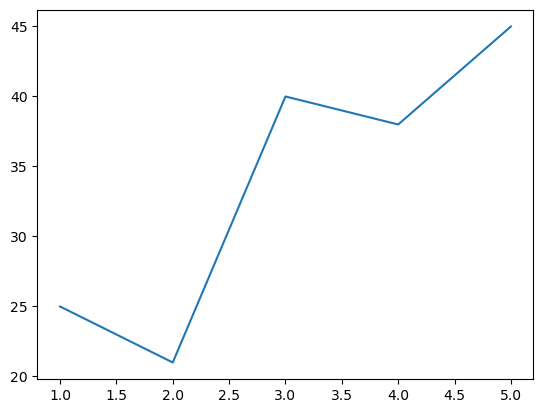

In [18]:
import numpy as nm
import matplotlib.pyplot as plt

x = nm.array([1,2,3,4,5])
y = nm.array([25,21,40,38,45])

plt.plot(x,y)
plt.show()

In [20]:
def gradient_descent(x,y):
    max_iterations = 1000
    learning_rate = 0.001
    iterations = 0
    n = len(x)
    m_curr = b_curr= 0
    while iterations<max_iterations:
        y_predicted = m_curr*x + b_curr
        cost = (1/n)*sum([val**2 for val in (y-y_predicted)])
        m_mod = -(2/n)*sum(x*(y-y_predicted))
        b_mod = -(2/n)*sum(y-y_predicted)
        m_curr = m_mod*learning_rate
        b_curr = b_mod*learning_rate
        print(f"Modified slope = {m_mod}, Modified intercept = {b_mod}, current_slope = {m_curr}, current_intercept = {b_curr}, cost = {cost}, iteration = {iterations}")
        iterations+=1

    
gradient_descent(x,y)


Modified slope = -225.60000000000002, Modified intercept = -67.60000000000001, current_slope = -0.22560000000000002, current_intercept = -0.06760000000000001, cost = 1227.0, iteration = 0
Modified slope = -230.96880000000002, Modified intercept = -69.08879999999999, current_slope = -0.23096880000000003, current_intercept = -0.06908879999999999, cost = 1283.1210420799998, iteration = 1
Modified slope = -231.09584640000003, Modified intercept = -69.12399040000001, current_slope = -0.23109584640000003, current_intercept = -0.06912399040000002, cost = 1284.4642940179701, iteration = 2
Modified slope = -231.0988525632, Modified intercept = -69.12482305920001, current_slope = -0.2310988525632, current_intercept = -0.06912482305920001, cost = 1284.4960866197937, iteration = 3
Modified slope = -231.09892369474562, Modified intercept = -69.1248427614976, current_slope = -0.23109892369474563, current_intercept = -0.0691248427614976, cost = 1284.4968388981947, iteration = 4
Modified slope = -231.

Pickle, joblib

In [8]:
import pickle
import joblib
joblib.dump(linear_reg, 'linear_reg_joblib')

['linear_reg_joblib']

In [14]:
with open("linear_reg_pickle", "wb") as f:
    pickle.dump(linear_reg, f)

In [10]:
x = joblib.load("linear_reg_joblib")
x.predict([[3000,15,11]])

array([[-654240.30764401]])

In [16]:
with open("linear_reg_pickle","rb") as f:
    y = pickle.load(f)
    print(y.predict([[1200,4,1]]))

[[413609.71590017]]
